#Olympics **EDA FINAL**

Marie Brunet

##Summary

**Source**: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

**Description:**

Basic bio data on athletes and medal results from Athens 1896 to Rio 2016.

**Dataset Files:**

* athlete_events.csv (271,116 rows, 15 columns): contains Olympic athlete data, including Name, Sex, Age, Height, Weight, Team, NOC (National Olympic Committee code), Year, Sport, Event, Medal, etc.

* noc_regions.csv (230 rows, 3 columns): Maps NOC codes to country regions and has an additional notes column.

**Dataset Dictionary:**
* ID: Unique identifier for each athlete
* Name: Athlete’s full name
* Sex: Athlete’s gender (M for Male, F for Female)
* Age: Athlete’s age during the event. Some values are missing
* Height: Athlete’s height in centimeters. Some values are missing
* Weight: Athlete’s weight in kilograms. Some values are missing
* Team: Name of the team or country the athlete represented
* NOC: National Olympic Committee 3-letter code, used to merge with noc_regions.csv
* Games: Year and type of Olympic Games
* Year: Year the Olympics took place
* Season: Type of Olympics, either Summer or Winter
* City: Host city of the Olympic Games
* Sport: The sport in which the athlete competed
* Event: Specific event within the sport
* Medal: Type of medal won
* Region: Full country/region name from noc_regions.csv
* Notes: Additional country-related notes


**Project Overview:**

This notebook aims to conduct a full Exploratory Data Analysis on the Global Superstore dataset. The process includes:
* Import Libraries and Set Notebook Defaults
* Data gathering and merging
* Data cleaning and preparation
* Exploratory data analysis using descriptive statistics and visualizations

#Import Libraries and Set Notebook Defaults

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Display all DataFrame columns
pd.set_option('display.max_columns', None)

#Set Pandas to display numberrs without scientific notation, with commas as thousands separators, and with two decimals
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Gathering and Merging

Merge the two files of the dataset into the df dataframe.

In [4]:
#Store the first csv file in df1
df1 = pd.read_csv('/content/drive/MyDrive/Descriptive Analytics/Olympics EDA/data/athlete_events.csv')

#Store the noc_regions.csv file to df2
df2 = pd.read_csv('/content/drive/MyDrive/Descriptive Analytics/Olympics EDA/data/noc_regions.csv')

#Merge df with df_noc and store it to df
df = df1.merge(df2, how='left', on='NOC')

#Display the first 10 rows of the dataframe
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.00,185.00,82.00,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.00,185.00,82.00,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.00,185.00,82.00,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.00,185.00,82.00,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


In [5]:
#Display the number of rows and columns of the merged data frame
df.shape

(271116, 17)

In [6]:
#Display the non-null values and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [7]:
#Display summary statistics of the merged,data frame
df.describe()

,ID,Age,Height,Weight,Year
count,"271,116.00","261,642.00","210,945.00","208,241.00","271,116.00"
mean,"68,248.95",25.56,175.34,70.70,"1,978.38"
std,"39,022.29",6.39,10.52,14.35,29.88
min,1.00,10.00,127.00,25.00,"1,896.00"
25%,"34,643.00",21.00,168.00,60.00,"1,960.00"
50%,"68,205.00",24.00,175.00,70.00,"1,988.00"
75%,"102,097.25",28.00,183.00,79.00,"2,002.00"
max,"135,571.00",97.00,226.00,214.00,"2,016.00"


In [8]:
#Get description of non-numeric fields
df.describe(include='object')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal,region,notes
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783,270746,5039
unique,134732,2,1184,230,51,2,42,66,765,3,205,21
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold,USA,Yugoslavia
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372,18853,2583


#Data Cleaning and Preparation

* Check for inconsistencies or missing values
* Clean the data and set datatypes

In [9]:
#Inspect the data type of each field
df.dtypes

,0
ID,int64
Name,object
Sex,object
Age,float64
Height,float64
Weight,float64
Team,object
NOC,object
Games,object
Year,int64


In [10]:
#Check if there are any missing values
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [11]:
#Drop the notes field because there are too many missing values and it is meaningless in the dataset
df.drop(columns='notes', inplace=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [12]:
#Rename the Region field 'Country'
df.rename(columns={'region': 'Country'}, inplace=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [13]:
#Move the Country field to the right of the Team field
new_order = ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'Country', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']
df = df[new_order]
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [14]:
# Replace missing values in Country with 'Unknown'
df['Country'] = df['Country'].fillna('Unknown')

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [15]:
#Check if there are anymore missing values in categorical fields
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
Country,0
NOC,0
Games,0


In [16]:
# Check number of unique values per field
df.nunique()

,0
ID,135571
Name,134732
Sex,2
Age,74
Height,95
Weight,220
Team,1184
Country,206
NOC,230
Games,51


In [17]:
# Count null values for each field
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
Country,0
NOC,0
Games,0


##Adding calculated fields

###Body Mass Index (BMI)

In [18]:
# Ensure Height is in meters
df['Height_m'] = df['Height'] / 100

# Calculate BMI only for rows where Height and Weight are not missing
df['BMI'] = df.apply(lambda row: row['Weight'] / (row['Height_m'] ** 2)
                     if pd.notna(row['Height_m']) and pd.notna(row['Weight']) else pd.NA, axis=1)

# Drop the temporary 'Height_m' column
df.drop(columns=['Height_m'], inplace=True)

#Display the first 5 rows of the dataset
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
0,1,A Dijiang,M,24.00,180.00,80.00,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.69
1,2,A Lamusi,M,23.00,170.00,60.00,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,20.76
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,<NA>
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,<NA>
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,23.96


###Age Group

In [19]:
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 18:
        return 'Under 18'
    elif age <= 25:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    else:
        return '45+'

df['Age Group'] = df['Age'].apply(categorize_age)

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI,Age Group
0,1,A Dijiang,M,24.00,180.00,80.00,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.69,18-25
1,2,A Lamusi,M,23.00,170.00,60.00,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,20.76,18-25
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,<NA>,18-25
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,<NA>,26-35
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,23.96,18-25


###Medal Indicator

In [20]:
df['Won Medal'] = df['Medal'].notna().astype(int)  # 1 if won a medal, 0 otherwise

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI,Age Group,Won Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.69,18-25,0
1,2,A Lamusi,M,23.00,170.00,60.00,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,20.76,18-25,0
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,<NA>,18-25,0
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,<NA>,26-35,1
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,23.96,18-25,0


###Competition Type (Individual VS Team)

In [21]:
# List of known team events (this can be expanded)
team_sports = ['Basketball', 'Football', 'Hockey', 'Rowing', 'Relay', 'Volleyball', 'Water Polo']

df['Competition Type'] = df['Sport'].apply(lambda x: 'Team' if x in team_sports else 'Individual')

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI,Age Group,Won Medal,Competition Type
0,1,A Dijiang,M,24.00,180.00,80.00,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.69,18-25,0,Team
1,2,A Lamusi,M,23.00,170.00,60.00,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,20.76,18-25,0,Individual
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,<NA>,18-25,0,Team
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,<NA>,26-35,1,Individual
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,23.96,18-25,0,Individual


#Exploratory data analysis using descriptive statistics and visualizations

##Visualizations
* Distribution of Athlete Ages
* Medal Distribution by Country
* Number of Athletes by Sport
* Medal Winners by Gender Over Time

In [22]:
# Generate summary statistics for numerical fields
df.describe()

,ID,Age,Height,Weight,Year,Won Medal
count,"271,116.00","261,642.00","210,945.00","208,241.00","271,116.00","271,116.00"
mean,"68,248.95",25.56,175.34,70.70,"1,978.38",0.15
std,"39,022.29",6.39,10.52,14.35,29.88,0.35
min,1.00,10.00,127.00,25.00,"1,896.00",0.00
25%,"34,643.00",21.00,168.00,60.00,"1,960.00",0.00
50%,"68,205.00",24.00,175.00,70.00,"1,988.00",0.00
75%,"102,097.25",28.00,183.00,79.00,"2,002.00",0.00
max,"135,571.00",97.00,226.00,214.00,"2,016.00",1.00


## Distribution of Athlete Ages

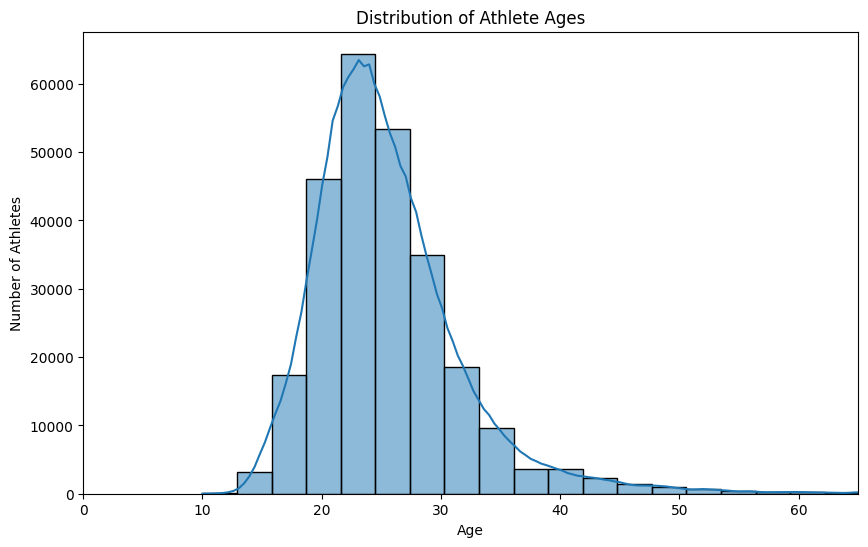

In [28]:
# Plot histogram of athlete ages
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)

# Set x-axis limit to stop at 65
plt.xlim(0, 65)

# Titles and labels
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.title('Distribution of Athlete Ages')

# Show the plot
plt.show()

This histogram shows that the age range that contains the most athletes is around 22 to 25 years old, and that most athletes are approximately between 13 and 33 years old, with some ouliners. The youngest age is around 10 years old while the oldest is around 60 years old.

##Medal Distribution by Country

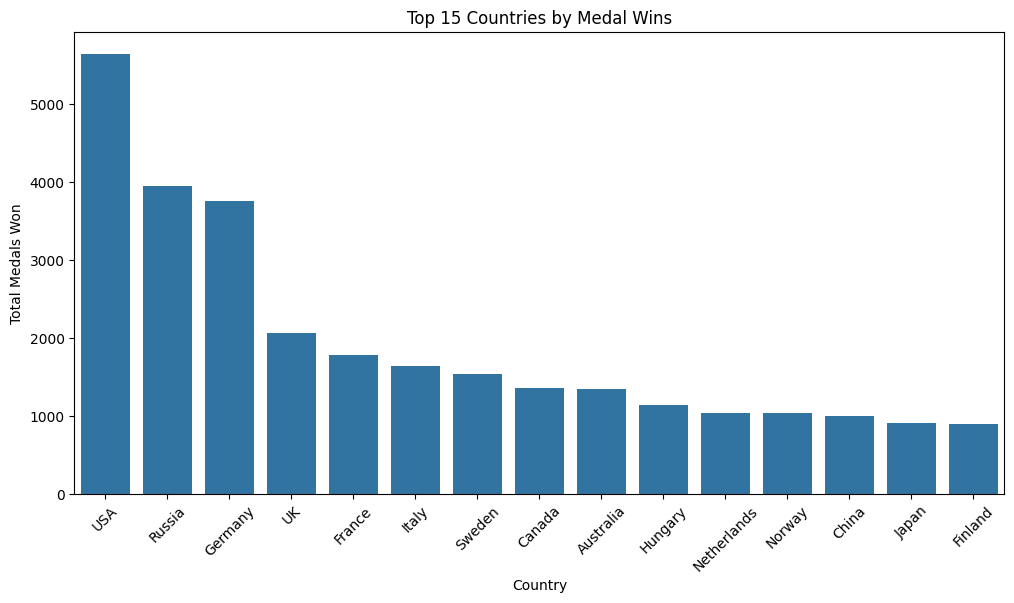

In [32]:
# Filter the dataset to include only rows where a medal was won
medal_winners = df[df['Won Medal'] == 1]

# Count the number of medals won by each country and select the top 15
medal_counts = medal_winners['Country'].value_counts().head(15)

# Plot the bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=medal_counts.index, y=medal_counts.values)

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Titles and labels
plt.xlabel('Country')
plt.ylabel('Total Medals Won')
plt.title('Top 15 Countries by Medal Wins')

# Show the plot
plt.show()

This bar chart shows that the USA were the country that won the most medals(around 5,500 medals), followed by Russia (around 4,000 medals), followed by Germany (around 3,900 medals). All the other countries following them in the top 15 have between 2,000 and 1,000 medals approximately.

## Number of Athletes by Sport

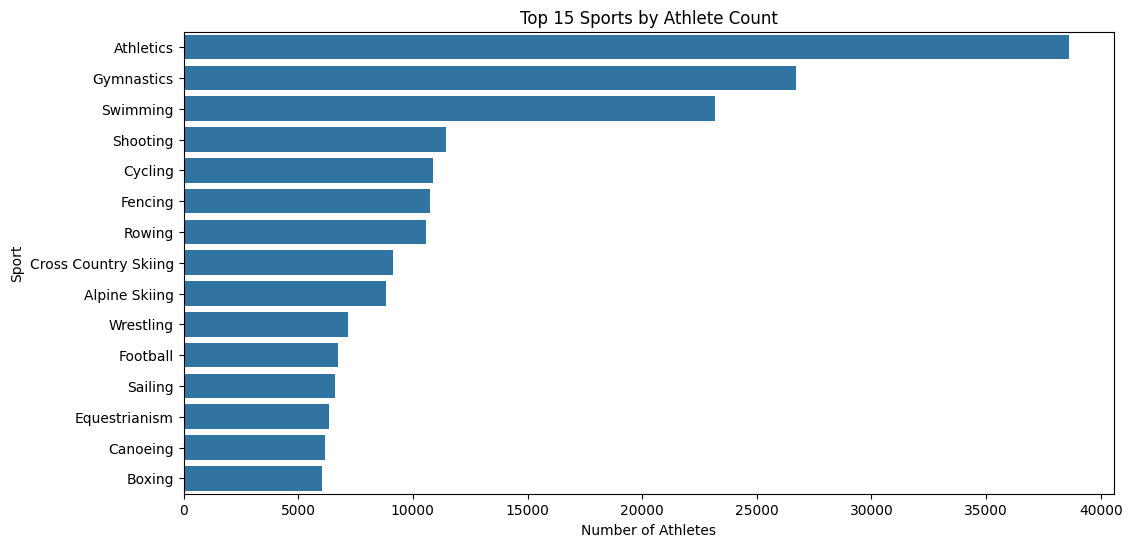

In [33]:
# Count the number of athletes participating in each sport
sport_counts = df['Sport'].value_counts().head(15)  # Get the top 15 most common sports

# Create a horizontal bar chart
plt.figure(figsize=(12,6))
sns.barplot(y=sport_counts.index, x=sport_counts.values)

# Titles and labels
plt.xlabel('Number of Athletes')
plt.ylabel('Sport')
plt.title('Top 15 Sports by Athlete Count')

# Show the plot
plt.show()


This bar chart shows that the sport that has the most athletes is athletics (with around 39,000 athletes), followed by Gymnastics (with around 27,000 athletes), followed by Swimming (with around 23,000 athletes). All the other sports following them in the top 15 have between 12,000 and 6,000 athletes approximately.

## Medal Winners by Gender Over Time

<Figure size 1200x600 with 0 Axes>

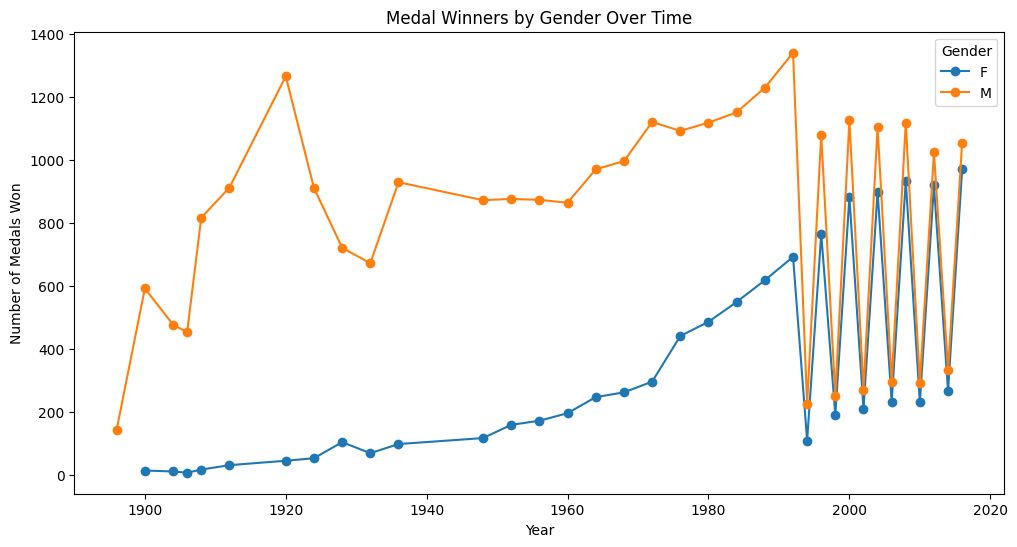

In [35]:
# Filter the dataset to include only rows where a medal was won
medal_winners = df[df['Won Medal'] == 1]

# Group by 'Year' and 'Sex', then count the number of occurrences (medals won)
medal_gender = medal_winners.groupby(['Year', 'Sex']).size().unstack()

# Create a line chart of medals won over time for each gender
# `kind='line'` specifies a line plot
# `marker='o'` adds circular markers at each data point for visibility
plt.figure(figsize=(12,6))
medal_gender.plot(kind='line', marker='o', figsize=(12,6))

# Titles and labels
plt.xlabel('Year')
plt.ylabel('Number of Medals Won')
plt.title('Medal Winners by Gender Over Time')
plt.legend(title='Gender')

# Show the plot
plt.show()

This line chart shows that between 1896 and around 1985, men have always won way more medals than women and the amount of medals won over time were not following the same pattern for both gender. However, after 1985, both genders started winning a very similar amount of medals and following the same pattern over time.